# Plot Contour maker

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from stage2 import *

In [30]:
data= 'EOS.txt'

In [31]:
logT, logRho, logP_stars, deltaP= np.genfromtxt(data, skip_header=1, unpack=True) 

In [32]:
#controler la taille de la figure
plt.rcParams['figure.figsize'] = [11, 11] #[largeur, hauteur]

#création de la figure
f = plt.figure()

#gérer l'écartement entre subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05) #wspace = écartement horizontal, #vspace=vertical ?
#je me disais aussi 
#faut copier et coller okay je m'ne charge 

<Figure size 792x792 with 0 Axes>

In [29]:
#for i in np.sort(deltaP)[::-10]:
#    print(i)
    #pourquoi ca fait ca ? il #ahaha je comprends pas
#je veux voir la plus grande valeur mais en fait ce que je souhaitr faire c'est affiné plus maybe rajouter plus de graduations ?

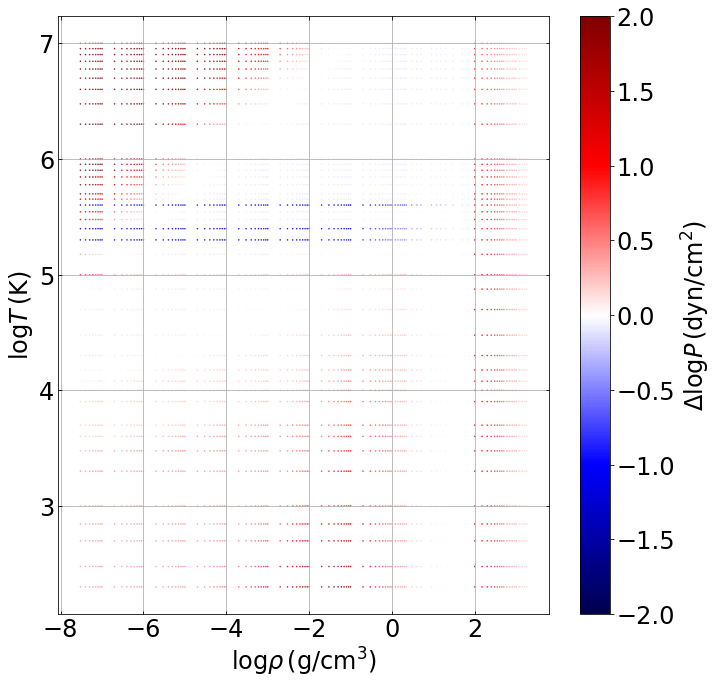

In [128]:
Ax, LW= asManyPlots(111, logRho, logT,
                    xlabel=r'$\log\rho \, (\rm{g/cm^{3}}$)', ylabel=r'$\log T \, (\rm {K})$',  
                    markerSize=[1], marker=['.'],
                    color=[deltaP], cmap= 'seismic', 
                     plotFlag=[False], showColorbar=True, cmapMin= -2, cmapMax=2, #? oui let us tryoh yeah
                    colorbarLabel=r'$\Delta \log P \, (\rm{dyn/cm^{2}})$')

#il est ou teamviewer ?
#what next ?
#Ca va pas changer grand chose
#T'avais deja plus ou moins -2, 5 en limites  ????? yeah sounds perfect but i don't want the grid i want it like yours mais deja on voit bien les ecarts 
#i know ...
#:( yeah !!! better  can beimproved yes pas mal wait j'ai une mielleur idee j'ai inverse yeah why not sinonjust an instant
# je te propose de savegarder ça en attendant yep .... but how ?: hihi)

#bbox_inches c'est pour enlever l'extra blanc sur les cotes par default
#comme ca facile a integrer dans latexathihi yes trop bien !! renomme avant c est bon ! prarfait
plt.savefig("inconsistency_STARS_Ch.pdf", bbox_inches='tight')

<Figure size 792x792 with 0 Axes>

In [34]:
#premiere etape : creer une grille virtuelle qui va servir pour l'interpolation (easy)
#c'est une grille donc il faut renseigner une variable qui va contenir les coordonnees X et un autre pour les Y

#meshgrid c'est pour faire la grille (dans un format un peu bizarre, mais on s'habitue)
#a partir de log T et log Rho (d'abord le X, puis le Y) 
X, Y = np.meshgrid(np.sort(np.unique(logT)), np.sort(np.unique(logRho)))

#maintenant faut creer un Z avec le meme format que le X et Y (easy)
# le [:] ca sert a dire de faire une copy. Sinon python il croit qu'on donne juste a X un deuxieme nom Z
#cette technique ne marche meme pas en fait...facepalm 
# et quand tu modifierais Z, ca modifierais X aussi...yep i see
Z = np.copy(X)

In [15]:
np.unique(logRho)

array([-8.        , -7.94999981, -7.9000001 , -7.8499999 , -7.80000019,
       -7.75      , -7.69999981, -7.6500001 , -7.5999999 , -7.55000019,
       -7.5       , -7.44999981, -7.4000001 , -7.3499999 , -7.30000019,
       -7.25      , -7.19999981, -7.1500001 , -7.0999999 , -7.05000019,
       -7.        , -6.94999981, -6.9000001 , -6.8499999 , -6.80000019,
       -6.75      , -6.69999981, -6.6500001 , -6.5999999 , -6.55000019,
       -6.5       , -6.44999981, -6.4000001 , -6.3499999 , -6.30000019,
       -6.25      , -6.19999981, -6.1500001 , -6.0999999 , -6.05000019,
       -6.        , -5.94999981, -5.9000001 , -5.8499999 , -5.80000019,
       -5.75      , -5.69999981, -5.6500001 , -5.5999999 , -5.55000019,
       -5.5       , -5.44999981, -5.4000001 , -5.3499999 , -5.30000019,
       -5.25      , -5.19999981, -5.1500001 , -5.0999999 , -5.05000019,
       -5.        , -4.94999981, -4.9000001 , -4.8499999 , -4.80000019,
       -4.75      , -4.69999981, -4.6500001 , -4.5999999 , -4.55

In [ ]:

#il faut remplir Z avec les bonnes valeurs z c'est deltaP non ? Oui mais en format bizarre hum
#en fait X et Y ce sont des grilles qui contiennt soit les coordonnées X ou Y des cases
#donc on va boucler je pense
#esperons que ca ne va pas etre long

#c'est pour boucler avec plusieurs variables en meme temps
# X et Y doivent avoir la meme dimension

size1 = np.shape(X)[0]
size2 = np.shape(Y)[0]
#2 dimension, première dimension= vecteur 
# une liste de liste =>deux boucles 
for index1, x, y in zip(range(size1), X, Y):
    for index2, valX, valY in zip(range(size2), x, y):
        #parfait on connait le x avec valX et le y avec valY
        #ainsi que la position (index1, index2) correspondante dans la grille
        #time for the complexity ah on n'y est pas ? presque.. .je croyais que c'était ca la partie difficile. Ah non...
        #on va decomposer pour que tu comprennes (je peux juste aller aux toilettes ? Oui bien sur merci je reviens !)

        #1 : trouver dans les vecteurs logT, logRho les endroits où ça vaut valX ou valY (pas exclusif le où)
        #c'est qui en X ? logT. Awesome
      
        #faisons pareil pour le Y, my lady
        #pour l'instant on ne garde que des matrices avec True ou False
        # le == ça cree une matrice de meme dimensions mais avec des True ou c'est égal et False où ça l'est pas des booléens quoi , oui...

        whereX = logT == valX
        whereY = logRho == valY
     
        #Awesome, maintenant on veut faire l'intersection, ça se fait avec np.logical_and
        #logical_and c'est un ET logique entre des True et False 
        # le where, ça donne toutes les positions ou il y a des True
        whereX_and_Y = np.logical_and(whereX,whereY)
        position = np.array(np.where(whereX_and_Y))[0][0]
        valZ = np.abs(deltaP[position])
        #if np.shape(valZ)==(1,) :
        Z[index1, index2] = valZ
        
            
        #print(np.shape(position[0]))
        #maintenant on va chercher le deltaP correspondant, yep
        
#        print(np.shape(valZ))


        #print(valZ)
        #et on l'assigne au Z
        
  #      Z[index1, index2] = valZ[0]


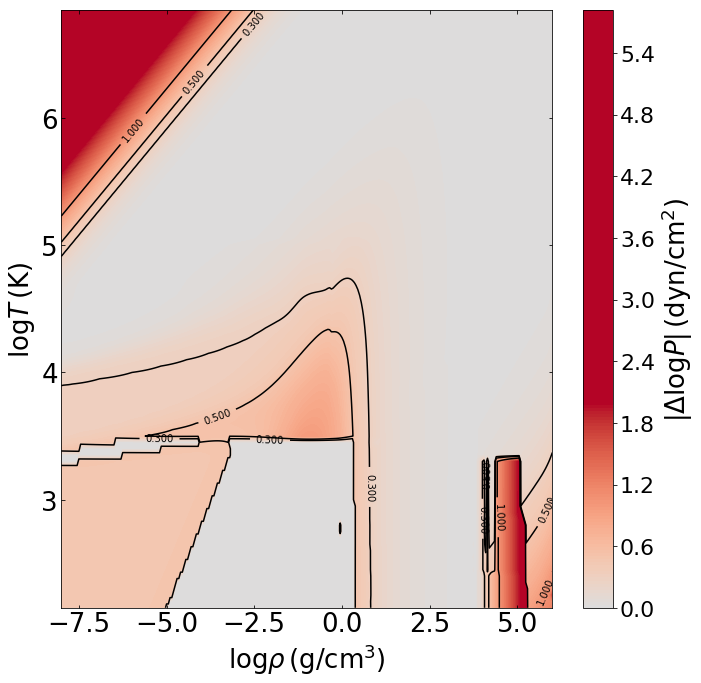

In [28]:
#je crois qu'on a nos donnees pretes ! TROP BIEN 
#c'etait pas facile pas du tt facile ss entendu

#on commence en tout premier par creer un axe (subplot qui sera le seul)
ax = plt.subplot(111)
#on le rend un peu plus joli que celui de base qui est tres laid, idem pour xaxis, please, bon tant pis je le fais manuellement. désolé j'ai eu un moment dassoupissement ..
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(which='both', direction='in', labelsize=26)

#on commence par faire un contour plot avec contourf
#d'abord le X, puis le Y, puis le Z (qui sert pour la couleur), après c'est le nombre de contours remplis (on en met plein !)
dt = ax.contourf(Y, X, Z, 200, cmap='coolwarm', vmin=-2, vmax=2)

#rajoutons une colorbar manuellement !
#on lui donne un objet qui a été tracé (ici le plot precedent)
col = plt.colorbar(dt)
#on lui donne un label
col.set_label(r'$|\Delta \log P| \, (\rm{dyn/cm^{2}})$', size=26)
ax.set_xlabel(r'$\log \rho \, \rm{(g/cm^{3})}$', size=26)
ax.set_ylabel(r'$\log T \, \rm{(K)}$', size=26)
#pour l'esthetique on augmente la taille des ticks de la colorbar (pour faire pro ;))
col.ax.tick_params(labelsize=22)

#essayons ! hum on a inversé log T log rHO, oups better ?pAS MAL!! let us try ah, le vmax n'a pas marché...pas grave c'est super bien!
#okay, bizarre mais pas mal quand meme 
#on peut rajouter des contours en traits pleins si tu veux, avec leur valeur ? Peut etre supérieur à 1, ouep

#les contours en trait c'est avec contour (sans f)
#dans levels tu mets les valeurs que tu veux contourer, sinon à la place de la liste tu peux mettre juste un chiffre
#ca indique le nombre de contours a tracer et ile se debrouille tout seul mais ? ah je viens de comprendre non en fait non delta P vaut pas au dessus de 10 
#clors c'est la couleur des contours
#10 c'est le nombre de contours a tracer, sinon tu fais' yep okay a last thing a ameliorer mais il ya de l'idee oui j'adore !!
#linestyle le type de ligne (-- c'est dashed line) i know :) you know everything John Loulou :o
cont = plt.contour(Y, X, Z, levels=[0.3,0.5,1], colors='black', linestyle="--")
cont.clabel(fontsize=10)
plt.savefig("inconsistency_STARS_Beck.pdf", bbox_inches='tight')

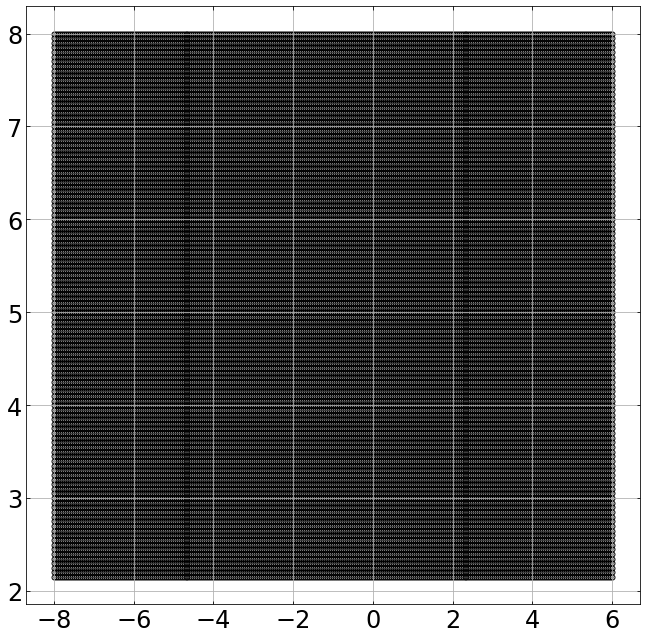

In [7]:
#retourne plusieures trucs (le dernier objet affiché à l'écran, Ax=esthétique)
#Numplot fonctionnement : numéro pour placer tes plots sur une grille = créé une grille de N lignes et K colonnes
# ex: 111 ou 121 ou 322, etc.
# 1er chiffre : nombre de lignes
# 2eme chiffre : nombre de colonnes
# 3eme chiffre : position du plot (1= en haut à gauche, puis compté positivement de gauche à droite, PUIS, de haut en bas)
Ax, LW= asManyPlots(111, [logRho], [logT],
                    markerSize=5, marker=['o'], unfilledFlag=[True] )


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from stage2 import *